## Cohere hackathon

- Build a multimodal capability abstraction
- Build an example based on that

In [1]:
from dotenv import load_dotenv
from rich import print

load_dotenv("../.env")

In [2]:
from agents.tools import wikipedia_search, image_inspector

from agents.llms import CohereChatCompletion
from agents.tool_executor import need_tool_use

from PIL import Image

In [3]:
llm = CohereChatCompletion()
llm.bind_tools([image_inspector, wikipedia_search])

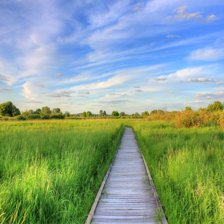

In [4]:
# Download https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg
image_path = "example.jpg"
Image.open(image_path).resize((224,224))

In [5]:
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant that has access to tools and use that to help humans. Once you have used a tool, use the response to formulate the answer to the original question."
    },
    {"role": "user", "content": f"Suggest me a location where I can go in London which looks similar to this image ```{image_path}```"}
]
output = llm.chat_completion(messages)
print(output)

ChatCompletion(
    id='run-6610f4e6-ea19-4947-aae6-1880ef0b4851-0',
    object='',
    created=1715295921,
    model='Cohere',
    choices=[
        Choice(
            index=0,
            logprobs=None,
            message=Message(
                role='assistant',
                content='',
                tool_calls=[
                    ToolCall(
                        id='0d3645b0f252476899051014ef3ef35b',
                        type='function',
                        function=FunctionInfo(
                            name='image_inspector',
                            arguments='{"image_url_or_path": "example.jpg"}'
                        )
                    )
                ]
            ),
            finish_reason='stop'
        )
    ],
    usage=Usage(prompt_tokens=-1, completion_tokens=16, total_tokens=-1)
)

In [6]:
if need_tool_use(output):
    tool_results = llm.run_tools(output)

    updated_messages = messages + tool_results
    output = llm.chat_completion(updated_messages)

2024-05-10 00:05:22.173 | INFO     | agents.tools:image_inspector:85 - Loading image inspector for first time. This might take a while...
objc[94185]: Class GGMLMetalClass is implemented in both /Users/aniket/miniconda3/envs/am/lib/python3.10/site-packages/llama_cpp/libllama.dylib (0x10e4e4260) and /Users/aniket/miniconda3/envs/am/lib/python3.10/site-packages/llama_cpp/libllava.dylib (0x1100b4260). One of the two will be used. Which one is undefined.


In [ ]:
llm.bind_tools([])
if need_tool_use(output):
    tool_results = llm.run_tools(output)

    updated_messages1 = updated_messages + tool_results
    llm = CohereChatCompletion()
    output = llm.chat_completion(updated_messages1)

In [ ]:
print(output.choices[0].message.content)